## Case Study, Part 1 - Dataset questions <br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fb_data = pd.read_csv("dataset_Facebook.csv",sep=';')

In [3]:
fb_data.shape

(500, 19)

In [4]:
fb_data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


### PART 1

##### 1. The most common (appears most in data) type of post is the Photo post 

In [5]:
fb_data.Type.value_counts(dropna=False)

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

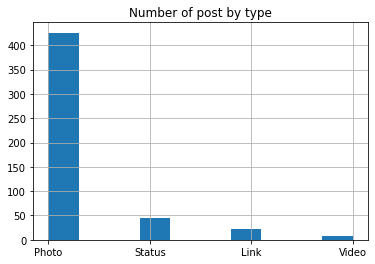

In [6]:
fb_data.Type.hist()
plt.title('Number of post by type')
plt.show()

##### 2. On average Video post recieved the most 'page total likes'. This agrees with 'like' metric.
This is the case for both mean and median averages

In [7]:
fb_data.groupby('Type')['Page total likes'].mean().sort_values(ascending=False)

Type
Video     135014.857143
Status    132647.044444
Photo     122354.171362
Link      116363.181818
Name: Page total likes, dtype: float64

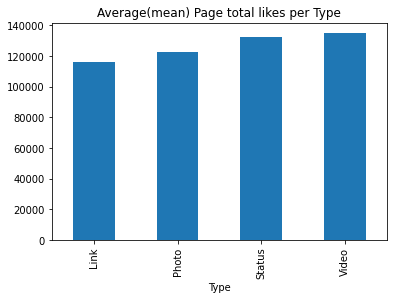

In [8]:
fb_data.groupby('Type')['Page total likes'].mean().plot(kind='bar')
plt.title('Average(mean) Page total likes per Type')
plt.show()

In [9]:
fb_data.groupby('Type')['like'].mean().sort_values(ascending=False)

Type
Video     231.428571
Photo     182.611765
Status    176.711111
Link       73.318182
Name: like, dtype: float64

There are some agreeance between the 'like' value and the average total likes. The highest and lowest in both cases are Video and Link respectively. However, the 2nd and 3rd positions are different. 

#### 3. Paid or unpaid
Paid videos tend to have more shares. The difference is smaller when comparing using the median rather than the mean. The mean is affected by the outlier.

Reason for behave: 

This may be because the paid videos are more likely to be from more established companies with brands and items which are more known. 

In [10]:
fb_data.groupby('Paid')['share'].mean().sort_values(ascending=False)

Paid
1.0    32.503597
0.0    25.219101
Name: share, dtype: float64

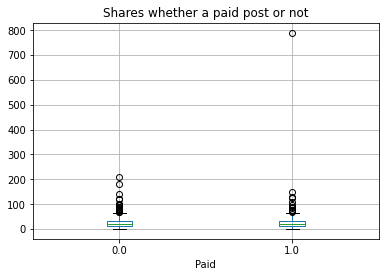

In [11]:
fb_data.boxplot(by='Paid',column='share')
plt.title('Shares whether a paid post or not')
plt.suptitle("")
plt.show()

##### 4. Consumption per user = Lifetime post consumption / Lifetime post consumers

The post month and post type that on average receive the most consumption per user is different from the post month and type which have the highest lifetime post consumer

In [12]:
fb_data['consumption_per_user'] = fb_data['Lifetime Post Consumptions'].div(fb_data['Lifetime Post Consumers'])

Calculate Average consumption per user split by type  and month

In [13]:
fb_data.groupby(['Type','Post Month'])['consumption_per_user'].mean()\
.reset_index()\
.sort_values('consumption_per_user',ascending=False)\
.head()

,Type,Post Month,consumption_per_user
10,Photo,3,3.771165
21,Status,4,2.567589
13,Photo,6,2.321690
22,Status,5,1.938383
31,Video,7,1.917059


Calculate Average lifetime post consumers split by type  and month

In [14]:
fb_data.groupby(['Type','Post Month'])['Lifetime Post Consumers'].mean()\
.reset_index()\
.sort_values('Lifetime Post Consumers',ascending=False)\
.head()

,Type,Post Month,Lifetime Post Consumers
31,Video,7,3822.000
26,Status,9,2614.750
21,Status,4,2567.000
27,Status,10,2487.125
29,Status,12,2089.750


#### 5. Photo month skewness
For post of type 'Photo' the consumption per user is most skewed in July

In [15]:
# there are no negative skews, so there is no need to take absolute when when finding maximum.
photo_only_df = fb_data[fb_data.Type=='Photo']
photo_only_df.groupby('Post Month')['consumption_per_user'].skew().sort_values(ascending=False)

Post Month
7     6.593561
12    5.185794
11    4.963404
6     4.608803
10    3.576568
1     1.445928
2     1.387401
8     1.364746
4     1.320492
3     0.932101
9     0.497539
5     0.131609
Name: consumption_per_user, dtype: float64

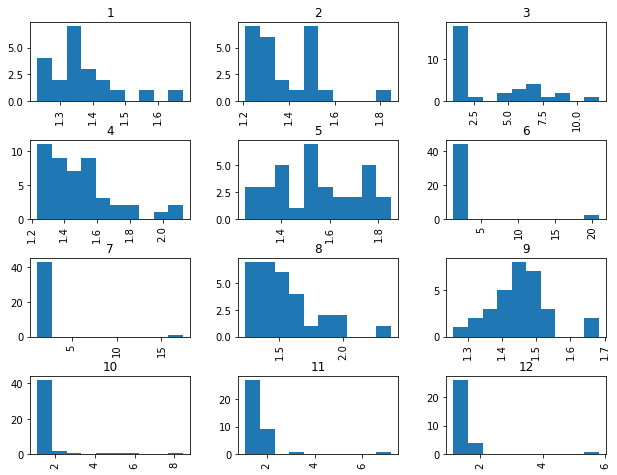

In [16]:
photo_only_df['consumption_per_user'].hist(by=photo_only_df['Post Month'],figsize=(10,8))
plt.show()